In [1]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 110842 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

In [4]:
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

In [6]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision

tcmalloc: large alloc 1073750016 bytes == 0x5baa8000 @  0x7faed39902a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [0]:
from os import listdir
from os.path import join
from nltk.corpus import stopwords
import numpy as np
import string
import torch
from torch.autograd import Variable
import torch.functional as F
import torch.nn.functional as F
import os

In [8]:
listdir('drive/')

['.Trash',
 'FIFA U17 ENG vs USA',
 'Photos',
 'Recordings',
 'Sem 3 notes',
 'Colab Notebooks']

In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ajaysub110","key":"0c536ec859d34c8604858ec017a52bf2"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [12]:
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list -s keras-imdb

ref                                          title                        size  lastUpdated          downloadCount  
-------------------------------------------  --------------------------  -----  -------------------  -------------  
rajivks/keras-imdb                           keras-imdb                   17MB  2018-02-16 23:46:53             12  
vikramtiwari/imdb-dataset-for-keras-imdbnpz  imdb.npz                     17MB  2018-07-16 04:22:27             35  
pankrzysiu/keras-imdb-reviews                Keras IMDB Reviews           17MB  2018-01-26 00:12:45             43  
pankrzysiu/keras-imdb                        Large Movie Review Dataset  115MB  2018-01-20 16:34:18            342  


In [13]:
!kaggle datasets download -f aclImdb_v1.zip --unzip pankrzysiu/keras-imdb

 95% 102M/108M [00:02<00:00, 50.8MB/s] 
100% 108M/108M [00:02<00:00, 50.7MB/s]


In [0]:
def load_doc(filename):
	file = open(filename, 'r')
	text = file.read()
	file.close()
	return text

def clean_doc(doc):
	tokens = doc.split()
	table = str.maketrans('', '', string.punctuation)
	tokens = [w.translate(table) for w in tokens]
	tokens = [word for word in tokens if word.isalpha()]
	# stop_words = set(stopwords.words('english'))
	# tokens = [w for w in tokens if not w in stop_words]
	tokens = [word for word in tokens if len(word) > 1]
	return tokens

def load_all(dir):
    corpus = []
    for subdir in ['pos/','neg/']:
        for f in listdir(join(dir,subdir)):
            text = load_doc(join(dir,subdir,f))
            corpus.append(' '.join(clean_doc(text)))

    return corpus
  
def tokenize_corpus(corpus):
    tokens = [x.split() for x in corpus]
    return tokens

In [0]:
directory = './aclImdb/train/'
# corpus = load_all(directory)
corpus = [
    'he is a king',
    'she is a queen',
    'he is a man',
    'she is a woman',
    'warsaw is poland capital',
    'berlin is germany capital',
    'paris is france capital',
]

In [0]:
tokenized_corpus = tokenize_corpus(corpus)

In [0]:
vocabulary = []
for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)

In [18]:
word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)
vocabulary_size

15

In [0]:
window_size = 3
idx_pairs = []
for sentence in tokenized_corpus:
    indices = [word2idx[word] for word in sentence]
    for center_word_pos in range(len(indices)):
        for w in range(-window_size, window_size + 1):
            context_word_pos = center_word_pos + w
            if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
                continue
            context_word_idx = indices[context_word_pos]
            idx_pairs.append((indices[center_word_pos], context_word_idx))

idx_pairs = np.array(idx_pairs)

In [0]:
def get_input_layer(word_idx):
    x = torch.zeros(vocabulary_size).float().cuda()
    x[word_idx] = 1.0
    return x

In [0]:
embedding_dims = 5
W1 = Variable(torch.randn(embedding_dims, vocabulary_size).float().cuda(), requires_grad=True)
W2 = Variable(torch.randn(vocabulary_size, embedding_dims).float().cuda(), requires_grad=True)
num_epochs = 1000
learning_rate = 0.001

In [24]:
for epo in range(num_epochs):
    loss_val = 0
    for data, target in idx_pairs[:100]:
        x = Variable(get_input_layer(data)).float().cuda()
        y_true = Variable(torch.from_numpy(np.array([target])).long()).cuda()

        z1 = torch.matmul(W1, x).cuda()
        z2 = torch.matmul(W2, z1).cuda()
    
        log_softmax = F.log_softmax(z2, dim=0).cuda()

        loss = F.nll_loss(log_softmax.view(1,-1), y_true).cuda()
        loss_val += loss.data
        loss.backward()
        W1.data -= learning_rate * W1.grad.data
        W2.data -= learning_rate * W2.grad.data

        W1.grad.data.zero_()
        W2.grad.data.zero_()
    if epo % 10 == 0:    
        print(f'Loss at epo {epo}: {loss_val/len(idx_pairs)}')

Loss at epo 0: 4.16618537902832
Loss at epo 10: 3.8095550537109375
Loss at epo 20: 3.5604655742645264
Loss at epo 30: 3.3776161670684814
Loss at epo 40: 3.237668514251709
Loss at epo 50: 3.1267733573913574
Loss at epo 60: 3.036358594894409
Loss at epo 70: 2.9609057903289795
Loss at epo 80: 2.8967185020446777
Loss at epo 90: 2.841228723526001
Loss at epo 100: 2.7925922870635986
Loss at epo 110: 2.749446153640747
Loss at epo 120: 2.710757255554199
Loss at epo 130: 2.6757283210754395
Loss at epo 140: 2.6437315940856934
Loss at epo 150: 2.6142711639404297
Loss at epo 160: 2.5869498252868652
Loss at epo 170: 2.561443328857422
Loss at epo 180: 2.537492513656616
Loss at epo 190: 2.514885425567627
Loss at epo 200: 2.4934465885162354
Loss at epo 210: 2.4730348587036133
Loss at epo 220: 2.4535322189331055
Loss at epo 230: 2.4348435401916504
Loss at epo 240: 2.416886568069458
Loss at epo 250: 2.399596929550171
Loss at epo 260: 2.3829188346862793
Loss at epo 270: 2.3668055534362793
Loss at epo 280

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [0]:
def tsne_plot():
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in word2idx.keys():
        tokens.append(W1[:,word2idx[word]].detach().cpu().numpy())
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

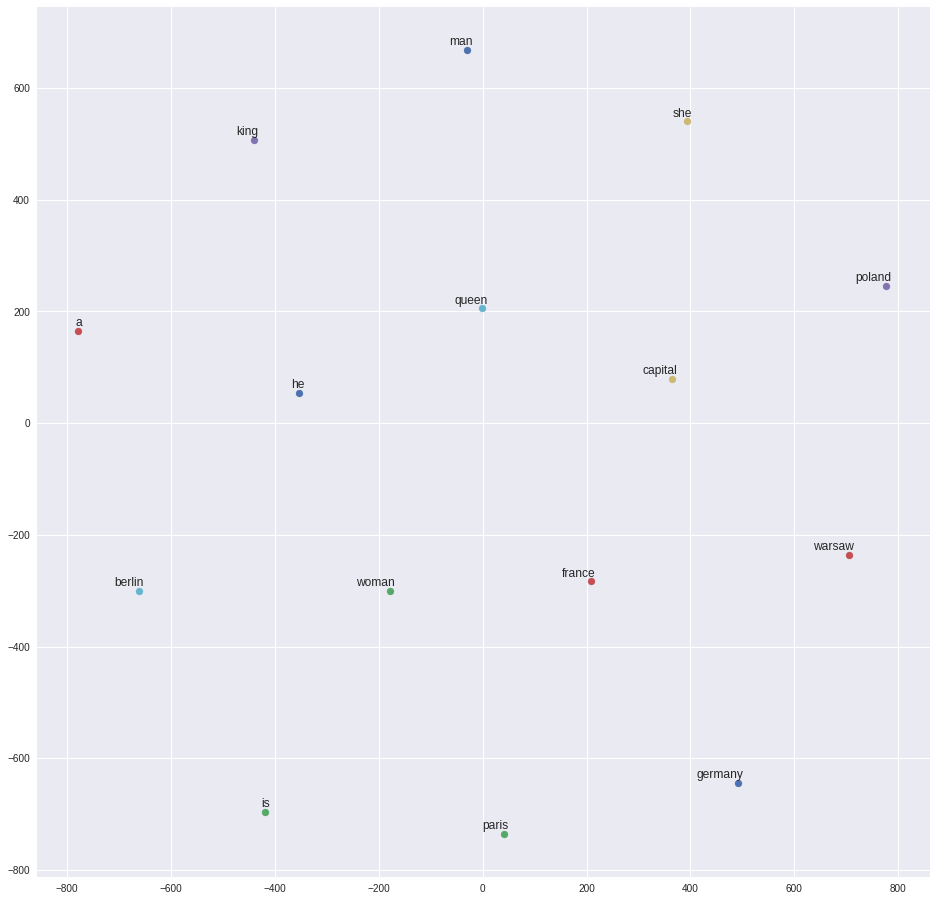

In [29]:
tsne_plot()